# Ejercicio 3 Caso Final

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Se carga el archivo de crímenes con pandas.

In [2]:
import pandas as pd

crime = pd.read_csv('crime_data.csv', sep = ',')
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Se elimina la variable `State` que se va a utilizar para la segmentación. 
Se crea una nueva variable `crime_data` para usar posteriormente.

In [3]:
col_names = list(crime.columns)
col_names.remove('State')

crime_data = crime[col_names]

Para seleccionar el número de clústeres en los que se divide los mamíferos se utiliza el método de la silueta.

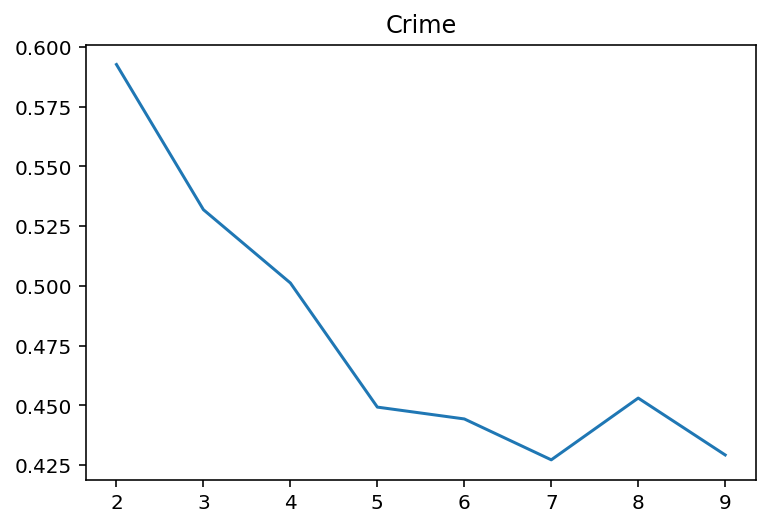

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(crime_data, 'Crime')



También podemos apoyarnos en el diagrama de dispersión

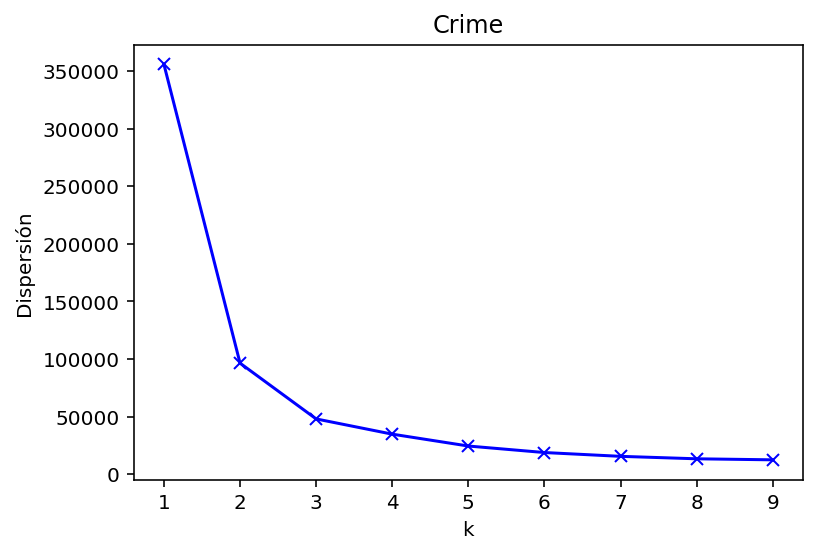

In [5]:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    title(figure_name)
    
plot_dispersion(crime_data, 'Crime')

En esta ocasión se puede apreciar que el número óptimo de clústeres es 3, por lo que se puede proceder al ajuste con `KMeans`. Una vez ajustados el modelo se puede imprimir las propiedades de los diferentes clústeres.

In [6]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(crime_data)
kmeans.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ]])

Ahora se pueden obtener a que clúster pertenece cada estado e imprimir los grupos por pantalla

In [7]:
clust = kmeans.predict(crime_data)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (crime["State"][clust == i])

Cluster 0
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
Cluster 1
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
41        Tennessee
42            Texas
45         Virginia
46       Washington
49          Wyoming
Name: State, dtype: object
Cluster 2
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27   